In [42]:
import networkx as nx
import numpy as np
from torch_geometric.utils import to_networkx

from motclass import MotDataset
from utilities import get_best_device

device = get_best_device()


[INFO] Using MPS.


In [43]:
def draw_graph(graph, track):
	G = to_networkx(graph, to_undirected=True)

	n_sum = [0] + list(np.cumsum(track.n_nodes))

	for i, n in enumerate(track.n_nodes):
		for j in range(n):
			G.nodes[j + n_sum[i]]['level'] = i

	pos = nx.multipartite_layout(G, subset_key="level")

	nx.draw(G, pos=pos, with_labels=True)


Processing frame #5 (000005.jpg):   0%|          | 4/2405 [00:00<03:45, 10.63it/s]


[INFO] 390 total edges


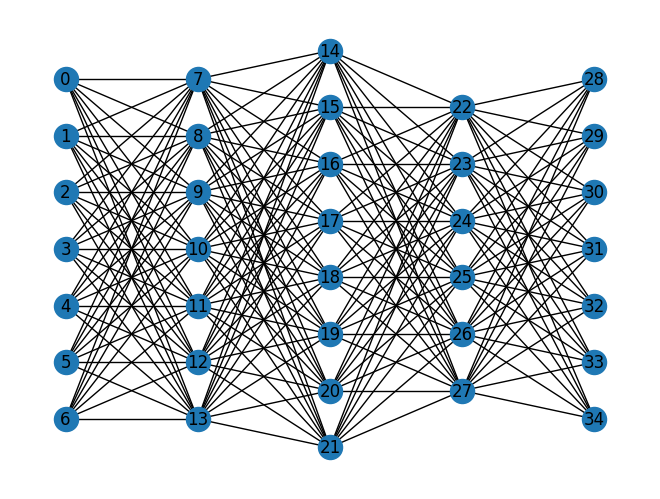

In [48]:
mot20 = MotDataset('data/MOT20', 'train', linkage_type=0, device=device)

track = mot20[0]

graph = track.get_graph(limit=5)

draw_graph(graph, track)


Processing frame #5 (000005.jpg):   0%|          | 4/2405 [00:00<03:44, 10.68it/s]


[INFO] 1956 total edges


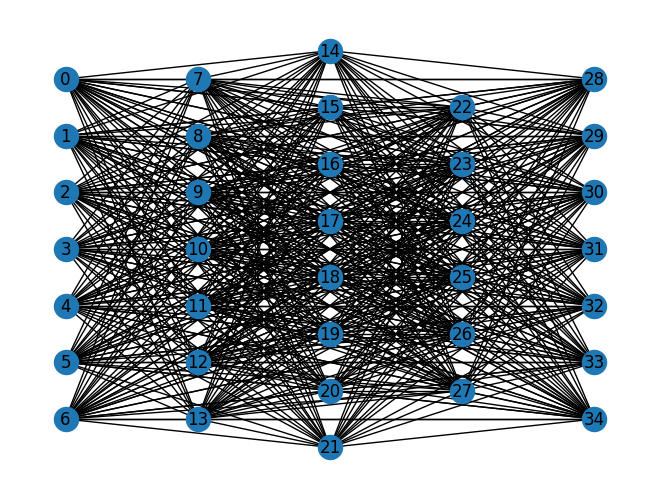

In [49]:
mot20 = MotDataset('data/MOT20', 'train', linkage_type=1, device=device)

track = mot20[0]

graph = track.get_data(limit=5)

draw_graph(graph, track)


---

In [ ]:
mot20 = MotDataset('data/MOT20', 'train', linkage_type=0, device=device)

track = mot20[0]

track.get_data(limit=5)


---

In [39]:
# Average size of images in MOT datasets

from PIL import Image
import os

mot20tr = MotDataset('data/MOT20', split='train', device=device)
mot17tr = MotDataset('data/MOT17', split='train', device=device)
mot15tr = MotDataset('data/MOT15', split='train', device=device)

def get_avg_size(motds):

	width = list()
	height = list()

	for track in motds:
		for f in os.listdir(track.img_dir):
			im = Image.open(os.path.join(track.img_dir,f))
			width.append(im.size[0])
			height.append(im.size[1])

	return tuple([(np.mean(width)), np.mean(height)])

print(get_avg_size(mot20tr))


(1620, 1026.1426491994177)
